<h2 style='color:blue'><center>Task Details</center></h2>
<p>Lets assume you are part of the team developing cyber security product. This product protects web and mobile applications from runtime attacks. The way hackers attack keeps on changing constantly and thats where Machine Learning comes into the picture. Your task is to develop machine learning model which can identify if the request is safe or not.</p>

Let's First import all the necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import json
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

<p style='color:red'>Note: So as to make it easier to read and process the data we would convert the json file into csv file. Some of the features are excluded below as they are same throughout the dataset and thus doesn't contribute in the prediction</p>

In [2]:
with open('security.json') as file:
    data=json.load(file)

In [3]:
base_url=[]
title=[]
desc=[]
fresh=[]
host=[]
user_agent=[]
content_type=[]
org_id=[]
user_session_id=[]
accept=[]
content_length=[]
name=[]
role=[]
hostname=[]
ip=[]
orignal_url=[]
path=[]
protocol=[]
secure=[]
stale=[]
xhr=[]
is_safe=[]

In [4]:
for i in data:
    a=str()
    for j in i['req']['baseUrl']:
        a=a+j
    base_url.append(a)
    
    a=str()
    for j in i['req']['body']["note"]["title"]:
        a=a+j
    title.append(a)
    
    a=str()
    for j in i['req']['body']["note"]["desc"]:
        a=a+j
    desc.append(a)
    
    fresh.append(i['req']['fresh'])
    
    a=str()
    for j in i['req']['headers']["host"]:
        a=a+j
    host.append(a)
    
    a=str()
    for j in i['req']['headers']["user-agent"]:
        a=a+j
    user_agent.append(a)
    
    a=str()
    for j in i['req']['headers']["content-type"]:
        a=a+j
    content_type.append(a)
    
    a=str()
    for j in i['req']['headers']["org_id"]:
        a=a+j
    org_id.append(a)
    
    a=str()
    for j in i['req']['headers']["user_session_id"]:
        a=a+j
    user_session_id.append(a)
    
    a=str()
    for j in i['req']['headers']["accept"]:
        a=a+j
    accept.append(a)
    
    a=str()
    for j in i['req']['headers']["content-length"]:
        a=a+j
    content_length.append(a)
    
    a=str()
    for j in i['req']['headers']["user"]["name"]:
        a=a+j
    name.append(a)
    
    a=str()
    for j in i['req']['headers']["user"]["role"]:
        a=a+j
    role.append(a)
    
    a=str()
    for j in i['req']['hostname']:
        a=a+j
    hostname.append(a)
    
    a=str()
    for j in i['req']['ip']:
        a=a+j
    ip.append(a)
    
    a=str()
    for j in i['req']['originalUrl']:
        a=a+j
    orignal_url.append(a)
    
    a=str()
    for j in i['req']['path']:
        a=a+j
    path.append(a)
    
    a=str()
    for j in i['req']['protocol']:
        a=a+j
    protocol.append(a)
    
    secure.append(i['req']['secure'])

    stale.append(i['req']['stale'])
    
    xhr.append(i['req']['xhr'])
    
    is_safe.append(i['isSafe'])


In [5]:
df=pd.DataFrame({
    'base_url':base_url,
    'title':title,
    'desc':desc,
    'host':host,
    'user-agent':user_agent,
    'content-type':content_type,
    'org-id':org_id,
    'user_session_id':user_session_id,
    'accept':accept,
    'content-length':content_length,
    'name':name,
    'role':role,
    'hostname':hostname,
    'ip':ip,
    'orignal url':orignal_url,
    'path':path,
    'protocol':protocol,
    'secure':secure,
    'stale':stale,
    'xhr': xhr,
    'is safe':is_safe
})
df

,base_url,title,desc,host,user-agent,content-type,org-id,user_session_id,accept,content-length,...,role,hostname,ip,orignal url,path,protocol,secure,stale,xhr,is safe
0,/crm/note,Tina Johnson,Top recognize eat. Fact whom spend area thing ...,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,70,...,sales1,example.com,::ffff:117.99.96.244,/crm/note,/note,http,False,True,False,True
1,/crm/note,Clayton Cooper,As possible American many prepare four strong....,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,70,...,sales1,example.com,::ffff:117.99.96.244,/crm/note,/note,http,False,True,False,True
2,/crm/note,Curtis Wolfe,Tuesday Notes or 2 like 2 XSP Class,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,70,...,sales1,example.com,::ffff:117.99.96.244,/crm/note,/note,http,False,True,False,False
3,/crm/note,Laura Fisher,State third represent energy campaign not forg...,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,70,...,sales1,example.com,::ffff:117.99.96.244,/crm/note,/note,http,False,True,False,True
4,/crm/note,Tyler Santos,Us enjoy since. Time identify image position o...,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,70,...,sales1,example.com,::ffff:117.99.96.244,/crm/note,/note,http,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,/crm/note,Bridget Elliott,Recently crime before five thought bit. Card f...,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,70,...,sales1,example.com,::ffff:117.99.96.244,/crm/note,/note,http,False,True,False,True
996,/crm/note,James Rocha,"<img src=1 href=1 onerror=""javascript:alert(1)...",example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,70,...,sales1,example.com,::ffff:117.99.96.244,/crm/note,/note,http,False,True,False,False
997,/crm/note,Jasmine Gibson,Set nature they then low resource truth. Edge ...,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,70,...,sales1,example.com,::ffff:117.99.96.244,/crm/note,/note,http,False,True,False,True
998,/crm/note,Mr. Antonio Valdez DDS,Push case them such face suffer. Letter middle...,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,70,...,sales1,example.com,::ffff:117.99.96.244,/crm/note,/note,http,False,True,False,True


Data Cleaning : We would remove the data which are same throughout the dataset and also the ones which doesn't affect the prediction like title.

In [6]:
for col in df.columns:
    print(f"unique items in {col} = {len(df[col].unique())} ")

unique items in base_url = 1 
unique items in title = 994 
unique items in desc = 750 
unique items in host = 1 
unique items in user-agent = 1 
unique items in content-type = 1 
unique items in org-id = 1 
unique items in user_session_id = 1 
unique items in accept = 1 
unique items in content-length = 1 
unique items in name = 1 
unique items in role = 1 
unique items in hostname = 1 
unique items in ip = 1 
unique items in orignal url = 1 
unique items in path = 1 
unique items in protocol = 1 
unique items in secure = 1 
unique items in stale = 1 
unique items in xhr = 1 
unique items in is safe = 2 


From the above we can see only the <b>desc</b> is not unique(title is too but since it doesn't have any effect in prediction we won't be considering it) so here <b>desc</b> is the <b>independent variable</b> while <b>is_safe</b> is the <b>dependent variable.</b> As desc is text we would be using <b>Natural Language Processing</b> to solve the problem.

In [7]:
X=df['desc']
Y=df['is safe']

Let's Split the data into training and testing data in 75:25 ratio

In [8]:
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.25,random_state=22)

In [9]:
np.where(Y_test==False)

(array([  1,   3,  11,  15,  18,  19,  22,  23,  24,  28,  31,  32,  33,
         34,  39,  40,  41,  42,  44,  45,  50,  53,  59,  64,  68,  73,
         80,  82,  89,  92,  93,  94,  95,  97, 101, 102, 105, 107, 112,
        113, 117, 119, 121, 122, 123, 124, 126, 128, 129, 131, 132, 137,
        138, 139, 140, 141, 143, 145, 146, 147, 152, 154, 156, 159, 161,
        163, 171, 174, 176, 179, 180, 181, 186, 187, 188, 189, 191, 194,
        195, 197, 199, 208, 209, 210, 211, 213, 214, 215, 216, 218, 220,
        223, 224, 225, 226, 228, 229, 230, 231, 236, 237, 240, 242, 246,
        247], dtype=int64),)

<h3>Model Building</h3>

We will now tokenize the words

In [10]:
vocab=1100
maxlen=24
embedding_dim=128
oov_token="<OOV>"

tokenizer=Tokenizer(num_words=vocab,oov_token=oov_token)
tokenizer.fit_on_texts(X_train)
word_index=tokenizer.word_index
word_index

{'<OOV>': 1,
 '1': 2,
 'javascript': 3,
 'title': 4,
 'alert': 5,
 'onerror': 6,
 'x': 7,
 'onpropertychange': 8,
 'src': 9,
 'notes': 10,
 'href': 11,
 'img': 12,
 'or': 13,
 'video': 14,
 'hello': 15,
 'meeting': 16,
 'note': 17,
 '3d1': 18,
 '3e': 19,
 'to': 20,
 'your': 21,
 'section': 22,
 'be': 23,
 'class': 24,
 'company': 25,
 '12': 26,
 '30': 27,
 'of': 28,
 'text1': 29,
 'like': 30,
 'data': 31,
 'its': 32,
 'blue': 33,
 'img\x13src': 34,
 'example': 35,
 'state': 36,
 'xxx': 37,
 'de': 38,
 '2': 39,
 'green': 40,
 'board': 41,
 'throughout': 42,
 'no': 43,
 'rich': 44,
 'way': 45,
 'check': 46,
 'miss': 47,
 'answer': 48,
 'probably': 49,
 'why': 50,
 'continue': 51,
 'point': 52,
 'population': 53,
 'themselves': 54,
 'image': 55,
 'health': 56,
 'face': 57,
 'stuff': 58,
 'when': 59,
 'current': 60,
 'seem': 61,
 'deep': 62,
 'dream': 63,
 'look': 64,
 'begin': 65,
 'task': 66,
 'best': 67,
 'growth': 68,
 'material': 69,
 'specific': 70,
 'item': 71,
 'shake': 72,
 'befor

In [11]:
train_sequences=tokenizer.texts_to_sequences(X_train)
train_padded=pad_sequences(train_sequences,maxlen=maxlen)

test_sequences=tokenizer.texts_to_sequences(X_test)
test_padded=pad_sequences(test_sequences,maxlen=maxlen)

In this model we would use GRU and Conv1D to draw the sentiment from the data as it increases the accuracy rather than using other layers.

In [12]:
model=tf.keras.Sequential([tf.keras.layers.Embedding(vocab,embedding_dim,input_length=maxlen),
                           tf.keras.layers.Conv1D(256,24,activation='sigmoid'),
                           tf.keras.layers.Bidirectional(tf.keras.layers.GRU(80)),
                           tf.keras.layers.Dense(150,activation='sigmoid'),
                           tf.keras.layers.Dense(1,activation='sigmoid')
                          ])
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
             )
history=model.fit(train_padded,Y_train,epochs=30)

Epoch 1/30
24/24 [==============================] - 1s 40ms/step - loss: 0.6502 - accuracy: 0.6333
Epoch 2/30
24/24 [==============================] - 1s 40ms/step - loss: 0.4597 - accuracy: 0.7880
Epoch 3/30
24/24 [==============================] - 1s 41ms/step - loss: 0.2456 - accuracy: 0.9053
Epoch 4/30
24/24 [==============================] - 1s 39ms/step - loss: 0.0265 - accuracy: 0.9960
Epoch 5/30
24/24 [==============================] - 1s 39ms/step - loss: 0.0042 - accuracy: 0.9987
Epoch 6/30
24/24 [==============================] - 1s 40ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 7/30
24/24 [==============================] - 1s 45ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 8/30
24/24 [==============================] - 1s 43ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 9/30
24/24 [==============================] - 1s 40ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 10/30
24/24 [==============================] - 1s 41ms/step - loss: 9.9778e-04 - accuracy: 1.0000
Epoch

<h4 style='color:red'><i>Note: The training data has 100% accuracy while testing data is giving accuracy of 83.6% which are signs of overfitting and thus high variance. This is due to the fact of low vocabulary while training. If the training data is much bigger thus increasing the vocabulary the model can avoid the problem of overfitting.</i><h4>

In [13]:
model.evaluate(test_padded,Y_test)

8/8 [==============================] - 0s 2ms/step - loss: 0.9279 - accuracy: 0.8360


[0.9278941750526428, 0.8360000252723694]

Let's Visualize accuracy and loss of training data vs the epochs

In [14]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

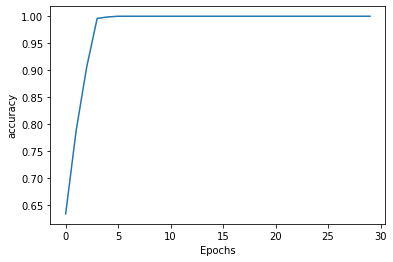

In [15]:
plot_graphs(history, 'accuracy')

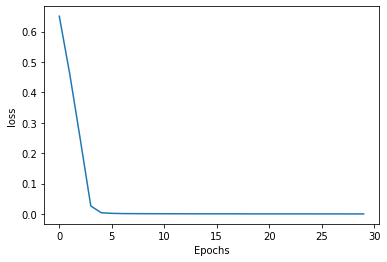

In [16]:
plot_graphs(history, 'loss')